In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_from_dir = 'C:/Users/young/Desktop/R/cats-dogs'
base_dir = base_dir='C:/Users/young/Desktop/R/kaggle_cat'

train_dir='C:/Users/young/Desktop/R/kaggle_cat/train'
val_dir='C:/Users/young/Desktop/R/kaggle_cat/val'
test_dir='C:/Users/young/Desktop/R/kaggle_cat/test'

train_cats_dir=f'C:/Users/young/Desktop/R/kaggle_cat/train/cats'
train_dogs_dir='C:/Users/young/Desktop/R/kaggle_cat/train/dogs'
val_cats_dir='C:/Users/young/Desktop/R/kaggle_cat/val/cats'
val_dogs_dir='C:/Users/young/Desktop/R/kaggle_cat/val/dogs'
test_cats_dir='C:/Users/young/Desktop/R/kaggle_cat/test/cats'
test_dogs_dir='C:/Users/young/Desktop/R/kaggle_cat/test/dogs'


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1/255,
                             zoom_range= 0.2)
data_gen = ImageDataGenerator(rescale = 1/255)

train_gen = train_data_gen.flow_from_directory(train_dir,
                                        target_size=(150,150),
                                        batch_size=20,
                                        class_mode='binary')
val_gen = data_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=20,
                                        class_mode='binary')
test_gen = data_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=20,
                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, activation='relu', input_shape=(150,150,3), kernel_size=3))
model.add(layers.MaxPool2D(2))
model.add(layers.Conv2D(32, activation='relu', kernel_size=3))
model.add(layers.MaxPool2D(2))
model.add(layers.Conv2D(32, activation='relu',  kernel_size=3))
model.add(layers.MaxPool2D(2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flat

In [5]:
history = model.fit_generator(train_gen,
                             steps_per_epoch=100,
                             epochs = 10,
                             validation_data= val_gen,
                             validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 13s 132ms/step - loss: 0.7196 - acc: 0.5265 - val_loss: 0.6840 - val_acc: 0.6130
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 0.6653 - acc: 0.6190 - val_loss: 0.6348 - val_acc: 0.6430
Epoch 3/10
100/100 [==============================] - 10s 97ms/step - loss: 0.6102 - acc: 0.6895 - val_loss: 0.6241 - val_acc: 0.6440
Epoch 4/10
100/100 [==============================] - 10s 98ms/step - loss: 0.5861 - acc: 0.7165 - val_loss: 0.6596 - val_acc: 0.6270
Epoch 5/10
100/100 [==============================] - 10s 97ms/step - loss: 0.5516 - acc: 0.7255 - val_loss: 0.6290 - val_acc: 0.6630
Epoch 6/10
100/100 [==============================] - 10s 97ms/step - loss: 0.5129 - acc: 0.7485 - val_loss: 0.5779 - val_acc: 0.6910
Epoch 7/10
100/100 [==============================] - 10s 96ms/step - loss: 0.4889 - acc: 0.7645 - val_loss: 0.5723 - val_acc: 0.7270
Epoch 8/10
10

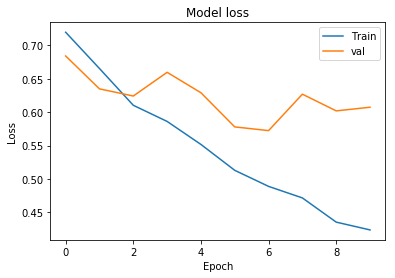

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


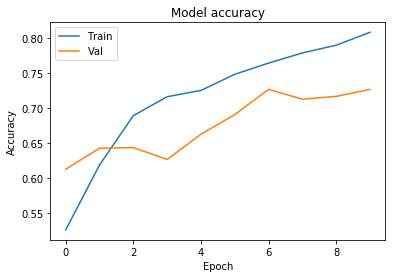

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()